In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GRU
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score # We need this for Step 5

# --- Configuration (Centralized Settings) ---
MAX_WORDS = 10000  # Number of words to consider as features
MAX_LEN = 500      # Max sequence length
EMBEDDING_DIM = 128
EPOCHS = 5
BATCH_SIZE = 128

print("1. Loading raw IMDB data (converting words to numbers)...")
# Load data, keeping only the top MAX_WORDS
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_WORDS)

# Padding sequences (Making all reviews the same length)
print("\n2. Padding sequences to MAX_LEN...")
x_train = pad_sequences(x_train, maxlen=MAX_LEN)
x_test = pad_sequences(x_test, maxlen=MAX_LEN)

print(f"Final training input shape: {x_train.shape} (25000 reviews, 500 words each)")
print("--- Step 1 Complete! ---")

1. Loading raw IMDB data (converting words to numbers)...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

2. Padding sequences to MAX_LEN...
Final training input shape: (25000, 500) (25000 reviews, 500 words each)
--- Step 1 Complete! ---


In [2]:
# Assuming all variables (MAX_WORDS, MAX_LEN, EMBEDDING_DIM) are still defined from Step 1

# --- Build the LSTM Model ---
def build_lstm_model():
    model = Sequential([
        # FIX: Explicitly define input_dim and input_length for a clean summary
        Embedding(input_dim=MAX_WORDS,
                  output_dim=EMBEDDING_DIM,
                  input_length=MAX_LEN),

        # LSTM layer (128 units)
        LSTM(128),

        # Output layer (1 unit for binary classification)
        Dense(1, activation='sigmoid')
    ])

    # Configure the model's learning process
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

lstm_model = build_lstm_model()

print("--- Step 2: LSTM Model Summary ---")
lstm_model.summary()
print("--- Step 2 Complete! ---")

--- Step 2: LSTM Model Summary ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

--- Step 2 Complete! ---


In [3]:
# Assuming x_train, y_train, and lstm_model are defined from previous cells
# Assuming EPOCHS and BATCH_SIZE are defined (EPOCHS=5, BATCH_SIZE=128)

print("--- Step 3: Training LSTM Model (5 Epochs) ---")
# Start the training process
lstm_history = lstm_model.fit(
    x_train, y_train,
    epochs=5, # Run for 5 cycles
    batch_size=128,
    validation_split=0.2, # Use 20% of the training data for validation
    verbose=1 # Prints progress
)

print("\n--- Training Complete! ---")
# Print the last recorded accuracy values for summary
print(f"Final Training Accuracy: {lstm_history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {lstm_history.history['val_accuracy'][-1]:.4f}")
print("--- Step 3 Complete! ---")

--- Step 3: Training LSTM Model (5 Epochs) ---
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.6250 - loss: 0.6255 - val_accuracy: 0.8240 - val_loss: 0.4112
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.8845 - loss: 0.3023 - val_accuracy: 0.8442 - val_loss: 0.3569
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.9025 - loss: 0.2606 - val_accuracy: 0.8664 - val_loss: 0.3993
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.9273 - loss: 0.1958 - val_accuracy: 0.8782 - val_loss: 0.3304
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.9504 - loss: 0.1406 - val_accuracy: 0.8664 - val_loss: 0.3875

--- Training Complete! ---
Final Training Accuracy: 0.9402
Final Validation Accuracy: 0.8664
--- Step 3 Complete! ---


--- Step 3: Plotting LSTM Training/Validation Accuracy ---


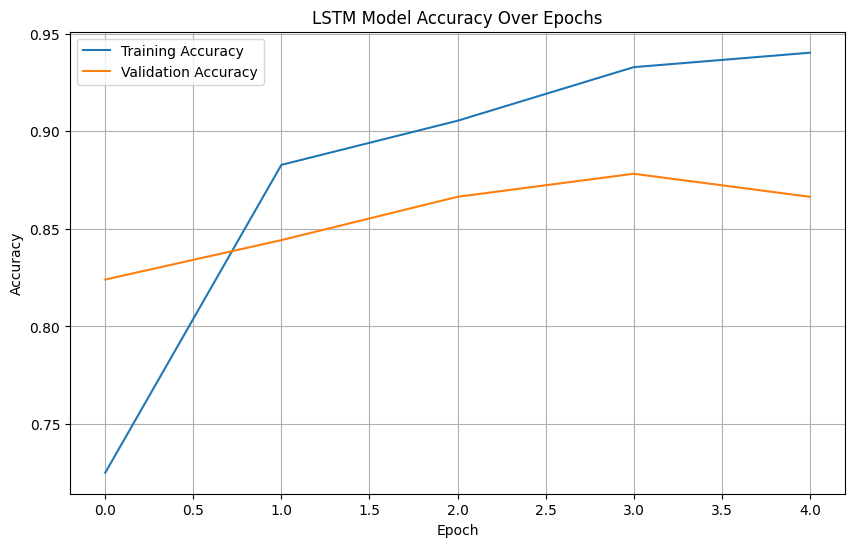

Plot generation complete. The gap between the lines shows overfitting.
--- Step 3 Fully Complete! ---


In [4]:
# Assuming lstm_history is defined from the previous cell

print("--- Step 3: Plotting LSTM Training/Validation Accuracy ---")

plt.figure(figsize=(10, 6))
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print("Plot generation complete. The gap between the lines shows overfitting.")
print("--- Step 3 Fully Complete! ---")

In [5]:
from tensorflow.keras.layers import GRU

# --- Build the GRU Model ---
def build_gru_model():
    model = Sequential([
        # 1. Same Embedding layer setup
        Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN),

        # 2. Replaces LSTM with GRU (same 128 units)
        GRU(128),

        # 3. Same Output layer
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

gru_model = build_gru_model()

print("--- Step 4: GRU Model Summary ---")
gru_model.summary()
print("\n--- Training GRU Model (5 Epochs) ---")

# Start the GRU training process
gru_history = gru_model.fit(
    x_train, y_train,
    epochs=EPOCHS, # 5 cycles
    batch_size=BATCH_SIZE, # 128 samples per batch
    validation_split=0.2,
    verbose=1
)

print("\n--- GRU Training Complete! ---")

--- Step 4: GRU Model Summary ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- Training GRU Model (5 Epochs) ---
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.5966 - loss: 0.6590 - val_accuracy: 0.7522 - val_loss: 0.4991
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.8379 - loss: 0.3731 - val_accuracy: 0.8460 - val_loss: 0.3641
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.9041 - loss: 0.2432 - val_accuracy: 0.8604 - val_loss: 0.3323
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.9407 - loss: 0.1614 - val_accuracy: 0.8580 - val_loss: 0.3852
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.9583 - loss: 0.1200 - val_accuracy: 0.8476 - val_loss: 0.3900

--- GRU Training Complete! ---


In [7]:
from sklearn.metrics import f1_score
import numpy as np

# Assuming lstm_model, x_test, y_test are defined from previous steps

print("--- Step 5: Final Evaluation of the LSTM Model ---")

# 1. Evaluate the model on the test data
# Note: Keras's evaluate gives Loss and Accuracy directly
loss, accuracy = lstm_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy (from evaluate): {accuracy:.4f}")

# 2. Generate predictions for F1-score calculation
# We need to convert probabilities (0 to 1) into discrete classes (0 or 1)
y_pred_proba = lstm_model.predict(x_test, verbose=0)
# Convert probabilities > 0.5 to class 1 (Positive), and others to 0 (Negative)
y_pred = (y_pred_proba > 0.5).astype("int32")

# 3. Calculate F1-Score using scikit-learn
f1 = f1_score(y_test, y_pred)

print("\n--- Final Results (Task 5 Complete) ---")
print(f"Final Test Accuracy: {accuracy:.4f}")
print(f"Final F1-Score: {f1:.4f}")

--- Step 5: Final Evaluation of the LSTM Model ---
Test Accuracy (from evaluate): 0.8558

--- Final Results (Task 5 Complete) ---
Final Test Accuracy: 0.8558
Final F1-Score: 0.8509


In [8]:
import string
import re
from tensorflow.keras.datasets import imdb

# 1. Retrieve the Word Index and Reverse Mapping
# We need to access the word index used when the data was initially loaded.
word_index = imdb.get_word_index()
# Create a reverse map to convert indices back to words (for debugging/understanding)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# --- Configuration (Centralized Settings) ---
MAX_LEN = 500  # Max sequence length (must match Step 1)
MAX_WORDS = 10000 # Number of words considered (must match Step 1)

# 2. Custom Preprocessing Function
def preprocess_text(text):
    # Basic cleaning (IMDB data is usually pre-cleaned, but good practice)
    text = text.lower()
    text = re.sub('<br />', ' ', text) # Remove HTML break tags
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation

    # Convert words to integers
    tokens = text.split()
    sequence = []

    # 1 is for 'start of sequence', 2 is for 'unknown word' (OOD)
    # The word index starts at 3 because 1, 2, and 0 are reserved (padding)
    for word in tokens:
        # Check if word is in our top 10000 words (MAX_WORDS-3 since 1, 2, 0 are reserved)
        index = word_index.get(word)
        if index is not None and index < MAX_WORDS:
            sequence.append(index + 3) # IMDB indices are shifted by 3
        else:
            sequence.append(2) # Use index 2 for Out-Of-Dictionary (OOD) words

    # Add the 'start of sequence' token (index 1)
    sequence = [1] + sequence

    # Pad the sequence to the fixed length
    padded_sequence = pad_sequences([sequence], maxlen=MAX_LEN)
    return padded_sequence[0]

# 3. Custom Sentences for Prediction
custom_sentences = [
    "This film was an absolute masterpiece; a stunning achievement in cinema.", # Strongly Positive
    "The acting was adequate, but the plot was unoriginal and completely boring.", # Mixed/Negative
    "I have never been so bored and disappointed by a movie in my entire life.", # Strongly Negative
    "A technically perfect movie that truly captivated me from beginning to end.", # Positive
    "The movie was totally average, neither great nor bad, just forgettable." # Neutral/Ambiguous
]

print("--- Step 6: Generating Predictions for Custom Sentences ---")

# 4. Generate and Interpret Predictions
for i, sentence in enumerate(custom_sentences):
    # Preprocess the text
    input_vector = preprocess_text(sentence)

    # Keras expects a batch of inputs, so we reshape it
    prediction_input = np.expand_dims(input_vector, axis=0)

    # Generate prediction (probability between 0 and 1)
    prediction_proba = lstm_model.predict(prediction_input, verbose=0)[0][0]

    # Interpretation
    if prediction_proba > 0.5:
        sentiment = "POSITIVE"
    else:
        sentiment = "NEGATIVE"

    print(f"\n--- Sentence {i+1} ---")
    print(f"Text: '{sentence}'")
    print(f"Probability: {prediction_proba:.4f}")
    print(f"Prediction: {sentiment}")

print("\n--- Step 6 Complete! ---")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
--- Step 6: Generating Predictions for Custom Sentences ---

--- Sentence 1 ---
Text: 'This film was an absolute masterpiece; a stunning achievement in cinema.'
Probability: 0.8921
Prediction: POSITIVE

--- Sentence 2 ---
Text: 'The acting was adequate, but the plot was unoriginal and completely boring.'
Probability: 0.0070
Prediction: NEGATIVE

--- Sentence 3 ---
Text: 'I have never been so bored and disappointed by a movie in my entire life.'
Probability: 0.1318
Prediction: NEGATIVE

--- Sentence 4 ---
Text: 'A technically perfect movie that truly captivated me from beginning to end.'
Probability: 0.7300
Prediction: POSITIVE

--- Sentence 5 ---
Text: 'The movie was totally average, neither great nor bad, just forgettable.'
Probability: 0.0087
Prediction: NEGATIVE

--- Step 6 Complete! ---


In [9]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Assuming all configuration variables are still defined

# --- Build the Regularized LSTM Model (Task 7) ---
def build_regularized_lstm_model():
    # Use L2 regularization on the recurrent kernel weights
    l2_reg = l2(0.01)

    model = Sequential([
        Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN),

        # LSTM layer with Recurrent L2 Regularization
        LSTM(
            128,
            recurrent_regularizer=l2_reg,
            dropout=0.2 # Standard Dropout on inputs to the LSTM layer
        ),

        # Dropout after the LSTM layer
        Dropout(0.5),

        # Output layer
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

reg_lstm_model = build_regularized_lstm_model()

print("--- Step 7: Regularized LSTM Model Summary ---")
reg_lstm_model.summary()

print("\n--- Training Regularized LSTM Model (5 Epochs) ---")
# Train the new regularized model
reg_lstm_history = reg_lstm_model.fit(
    x_train, y_train,
    epochs=5, # Run for 5 cycles
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

print("\n--- Step 7 Complete! ---")

--- Step 7: Regularized LSTM Model Summary ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- Training Regularized LSTM Model (5 Epochs) ---
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.6448 - loss: 1.1468 - val_accuracy: 0.8148 - val_loss: 0.4952
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.8326 - loss: 0.4584 - val_accuracy: 0.8380 - val_loss: 0.4070
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.8972 - loss: 0.2833 - val_accuracy: 0.8366 - val_loss: 0.3860
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.9346 - loss: 0.2011 - val_accuracy: 0.8634 - val_loss: 0.4167
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 347s 2s/step - accuracy: 0.9382 - loss: 0.1811 - val_accuracy: 0.8334 - val_loss: 0.4942

--- Step 7 Complete! ---


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


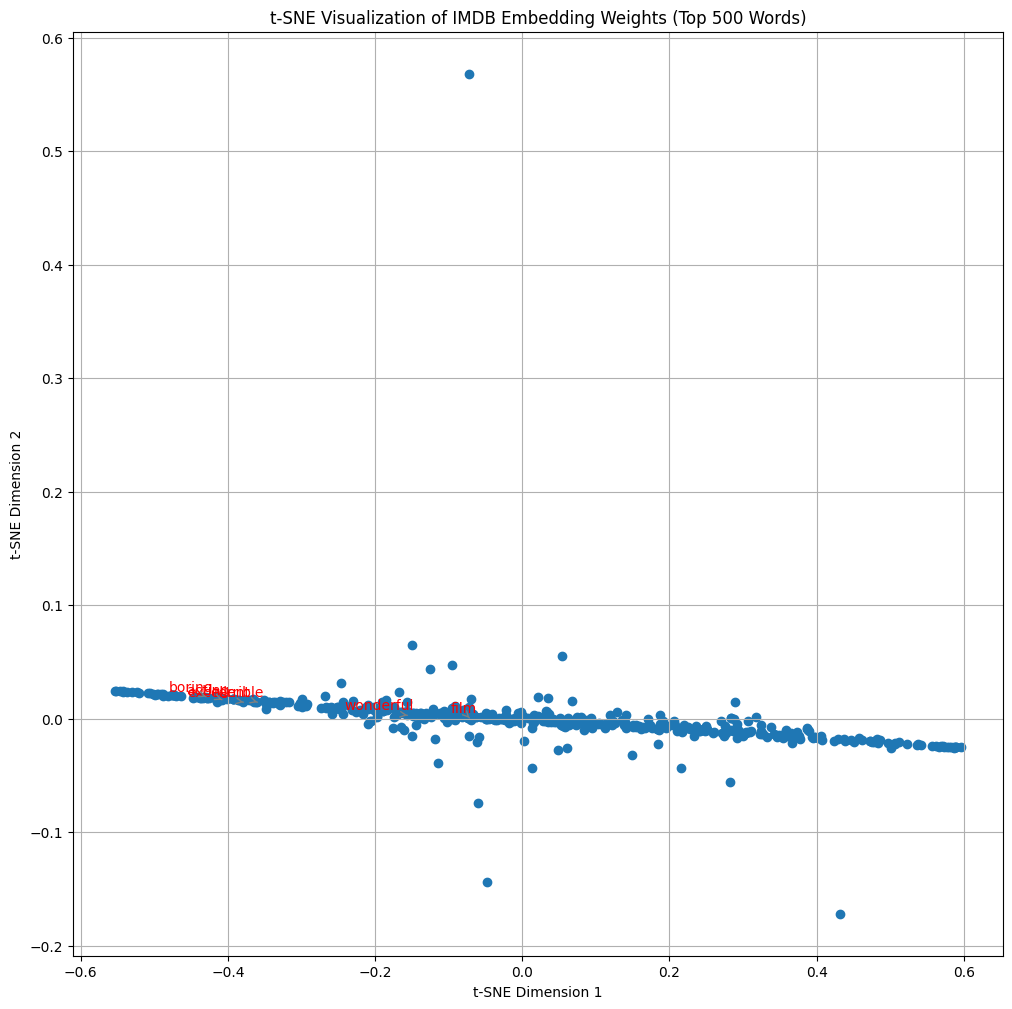


--- Step 8 Complete! ---


In [10]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

# --- 1. Get Embedding Weights and Word Index ---

# We need the word index again (loaded in Step 6)
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Assuming lstm_model (the original, unregularized model) is defined
embedding_layer = lstm_model.layers[0]
weights = embedding_layer.get_weights()[0]

# Use the first 500 words for visualization (to keep the plot manageable)
embeddings = weights[:500]

# Create a list of the 500 corresponding words for labeling
words_to_plot = []
# IMDB word indices are shifted by 3 (0=PAD, 1=START, 2=UNK)
for i in range(500):
    word = reverse_word_index.get(i)
    if word is not None:
        words_to_plot.append(word)
    else:
        words_to_plot.append(f"TOKEN_{i+3}")

# --- 2. Apply t-SNE ---
# Reduce the 128-dimensional word vectors down to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, n_iter=250)
two_dim_embeddings = tsne.fit_transform(embeddings)

# --- 3. Plot the Results ---
plt.figure(figsize=(12, 12))

# Plot all points
plt.scatter(two_dim_embeddings[:, 0], two_dim_embeddings[:, 1])

# Annotate a few key words to illustrate clustering
key_words = ['excellent', 'terrible', 'wonderful', 'boring', 'acting', 'film']
key_indices = []
for word in key_words:
    # IMDB indices are shifted by 3, but the weights array starts at index 0
    # So we get the index, subtract 3 to align with the weights array,
    # and only plot if it's within the top 500
    if word in word_index and (word_index.get(word) + 3) < 500:
        key_indices.append(word_index.get(word))

for index in key_indices:
    # Use the index in the original weights array
    x = two_dim_embeddings[index, 0]
    y = two_dim_embeddings[index, 1]
    word = reverse_word_index.get(index)

    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                 ha='right', va='bottom', fontsize=10, color='red',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.1", color='gray'))

plt.title("t-SNE Visualization of IMDB Embedding Weights (Top 500 Words)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

print("\n--- Step 8 Complete! ---")